In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('cameraman.tiff')
print(img)

cv.imshow('cameraman', img)
cv.waitKey(0)
cv.destroyAllWindows()


[[[157 157 157]
  [157 157 157]
  [157 157 157]
  ...
  [151 151 151]
  [153 153 153]
  [155 155 155]]

 [[157 157 157]
  [157 157 157]
  [157 157 157]
  ...
  [153 153 153]
  [153 153 153]
  [153 153 153]]

 [[159 159 159]
  [159 159 159]
  [159 159 159]
  ...
  [155 155 155]
  [155 155 155]
  [153 153 153]]

 ...

 [[108 108 108]
  [126 126 126]
  [129 129 129]
  ...
  [139 139 139]
  [129 129 129]
  [110 110 110]]

 [[129 129 129]
  [114 114 114]
  [120 120 120]
  ...
  [139 139 139]
  [133 133 133]
  [112 112 112]]

 [[118 118 118]
  [137 137 137]
  [118 118 118]
  ...
  [126 126 126]
  [133 133 133]
  [112 112 112]]]


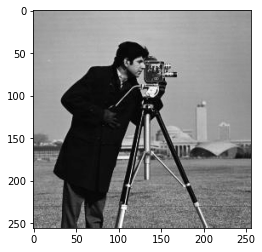

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('cameraman.ppm')
plt.imshow(img1)

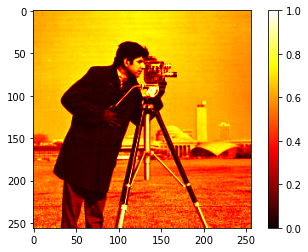

In [3]:
img2 = img1[:, :, 0]
plt.imshow(img2, cmap='hot')
plt.colorbar()

1. Conversions

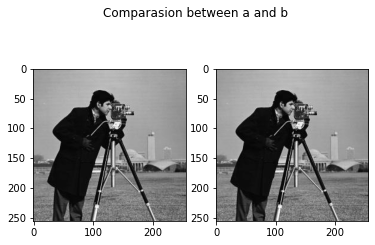

In [7]:
import numpy as np

a = plt.imread('cameraman.ppm')

#print(a.astype(np.uint8)*255)
b = a
b += 50
b -= 100
b += 50

fig, ax = plt.subplots(1, 2)
fig.suptitle('Comparasion between a and b')
ax[0].imshow(a)
ax[1].imshow(b)

# cv.imshow('a', a)
# cv.imshow('b', b)
# cv.waitKey(0)
# cv.destroyAllWindows()

2. RGB image

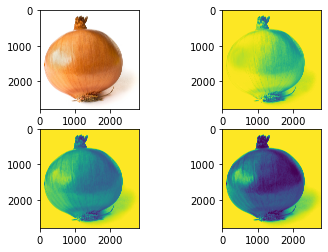

In [5]:
a = plt.imread('onion.jpeg')

plt.subplot(2, 2, 1).imshow(a)

for k in range(1, 4):
    plt.subplot(2, 2, k+1).imshow(a[:, :, k-1])


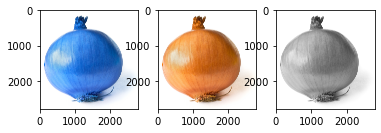

In [27]:
a = cv.imread('onion.jpeg') #BGR
a_rgb = cv.cvtColor(a, cv.COLOR_BGR2RGB) #RGB
a_gray = cv.cvtColor(a, cv.COLOR_BGR2GRAY) #GRAY
imgs = [a, a_rgb]

for i in range(1, 3):
    plt.subplot(1, 3, i).imshow(imgs[i-1])

plt.subplot(1, 3, 3).imshow(a_gray, cmap="gray", vmin=0, vmax=255)


3. Rescaling

In [8]:
def rescale(image, scale = 0.8):
    height = int(image.shape[0] * scale)
    width = int(image.shape[1] * scale)
    dim = (height, width)

    return cv.resize(img, dim, interpolation=cv.INTER_AREA)


In [9]:
img = cv.imread('onion.jpeg')
img_resized = rescale(img, 0.53)

cv.imshow('Original', img)
cv.imshow('Rescaled', img_resized)

cv.waitKey(10)
cv.destroyAllWindows()

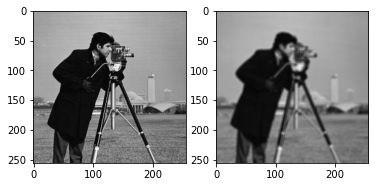

In [5]:
blur = cv.GaussianBlur(img, (5, 5), cv.BORDER_DEFAULT)
plt.subplot(1, 2, 1).imshow(img)
plt.subplot(1, 2, 2).imshow(blur)

Text(0.5, 1.0, 'Blur')

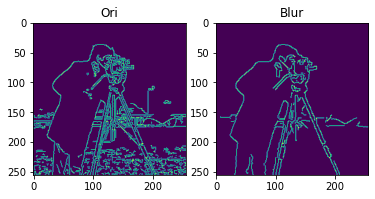

In [9]:
edge_ori_img = cv.Canny(img, 120, 180)
edge_blur_img = cv.Canny(blur, 120, 180)

plt.subplot(1, 2, 1).imshow(edge_ori_img)
plt.title('Ori')
plt.subplot(1, 2, 2).imshow(edge_blur_img)
plt.title('Blur')

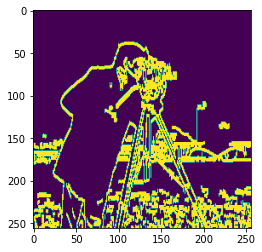

In [17]:
dilated_img = cv.dilate(edge_ori_img, (6, 6), iterations=3)
plt.imshow(dilated_img)

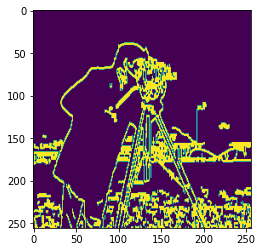

In [22]:
eroded_img = cv.erode(dilated_img, (3, 3), iterations=1)
plt.imshow(eroded_img)

4. Change the dynamics of an image

In [ ]:
#rgb2ind / bgr2ind
color2index = {
    (255, 255, 255) : 0,
    (0,     0, 255) : 1,
    (0,   255, 255) : 2,
    (0,   255,   0) : 3,
    (255, 255,   0) : 4,
    (255,   0,   0) : 5
}

def rgb2mask(img):

    assert len(img.shape) == 3
    height, width, ch = img.shape
    assert ch == 3

    W = np.power(256, [[0],[1],[2]])

    img_id = img.dot(W).squeeze(-1) 
    values = np.unique(img_id)

    mask = np.zeros(img_id.shape)

    for i, c in enumerate(values):
        try:
            mask[img_id==c] = color2index[tuple(img[img_id==c][0])] 
        except:
            pass
        
    return mask